In [4]:
%matplotlib notebook
import os
import torch
import numpy as np
from torch import nn
from torch.nn import functional as F
from PIL import Image
import torchvision as tv
from matplotlib import pyplot as plt

style_image_dir = os.getcwd() + '/images/style_image/'
content_image_dir = os.getcwd() + '/images/content_image/'
model_dir = os.getcwd() + '/Models/'

In [5]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

## Import transformation network architecture classes

In [6]:
from trans_net import TransNet

## Run demo

Trained model loaded


<IPython.core.display.Javascript object>


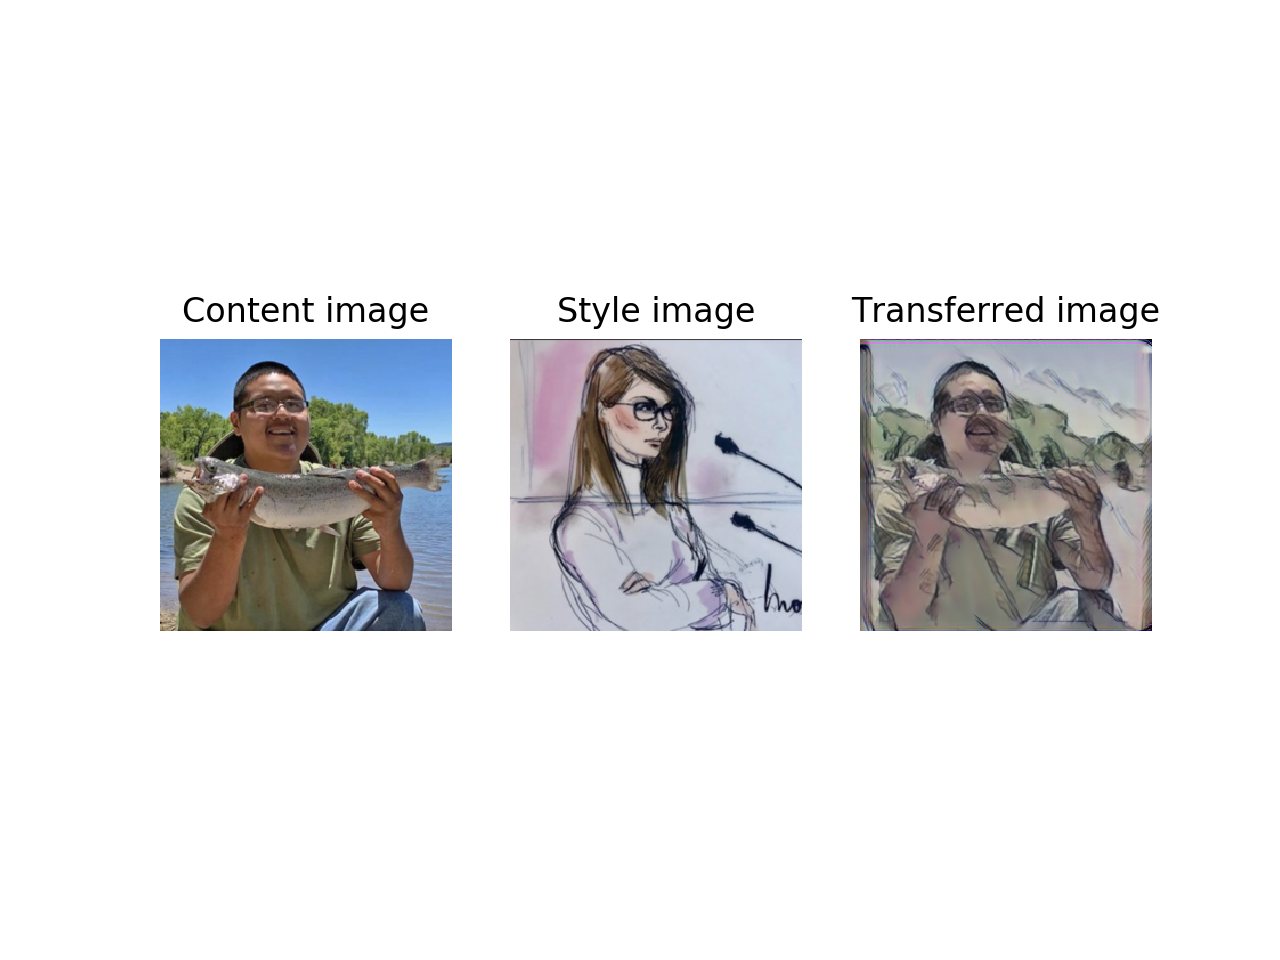

In [10]:
# Change 'style' to load different style network
style = 'sketch'
# Change the 'content' to load different content image
content = 'touchfish'

p_fn = model_dir+style+'.txt'
c_fn = model_dir+style+'.pth.tar'

if os.path.isfile(c_fn):
    checkpoint = torch.load(c_fn) # load check point
    transnet = TransNet().to(device) 
    transnet.load_state_dict(checkpoint)
    del checkpoint
    print('Trained model loaded')
    content_img = image_loader(content_image_dir+ content + '.jpg').view([1, 3, 256, 256]).to(device)
    transfered_img = transnet(content_img)
    style_img = image_loader(style_image_dir+style+'.jpg').to(device)

    plt.subplot(1, 3, 1)
    plt.title('Content image')
    imshow(np.squeeze(content_img))
    plt.subplot(1, 3, 2)
    plt.title('Style image')
    imshow(np.squeeze(style_img))
    plt.subplot(1, 3, 3)
    plt.title('Transferred image')
    imshow(np.squeeze(transfered_img.detach()))
else:
    print('Model not found!')